# Task 2: Quantitative Analysis using yfinance and TA-Lib

In this notebook, we will perform quantitative analysis on stock data using the yfinance and TA-Lib libraries. I will load stock price data, calculate technical indicators, and visualize the results.

## Load and Prepare the Data

Load the stock price data and perform basic error handling to ensure the data is loaded correctly.

In [6]:
import pandas as pd
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Load your stock price data with the adjusted path
try:
    df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')  # Adjust path if necessary
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: The file was not found.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Check if 'df' was defined
if 'df' in locals():
    print(df.head())
else:
    print("DataFrame 'df' is not defined.")

Current Working Directory: c:\Users\metya\Desktop\financial-news-sentiment-analysis\notebooks
Data loaded successfully.
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Calculate Basic Technical Indicators

Calculate various technical indicators using TA-Lib, including Simple Moving Averages (SMA) and the Relative Strength Index (RSI).

In [7]:
import talib

# Calculate Moving Averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Calculate RSI
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD
df['MACD'], df['MACD_signal'], _ = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Display the DataFrame with new indicators
print(df[['Close', 'SMA_20', 'SMA_50', 'RSI', 'MACD']].tail())

            Close      SMA_20      SMA_50        RSI      MACD
10993  218.539993  224.228500  208.474199  48.687742  4.662717
10994  217.490005  224.440500  209.098399  47.386437  3.748082
10995  217.960007  224.633500  209.709000  48.055700  3.026267
10996  218.240005  225.014500  210.279400  48.476184  2.448591
10997  218.800003  225.117001  210.858600  49.359115  2.012764


## Use yfinance for Financial Metrics

Retrieve financial metrics using the yfinance library.

In [15]:
import yfinance as yf

# Load stock data using yfinance
ticker = yf.Ticker('AAPL')  # Replace 'AAPL' with your stock symbol
financials = ticker.financials

# Display financial metrics
print(financials)

                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0   
Total Expenses      

## Visualize the Data

Create visualizations for the stock price and the calculated indicators.

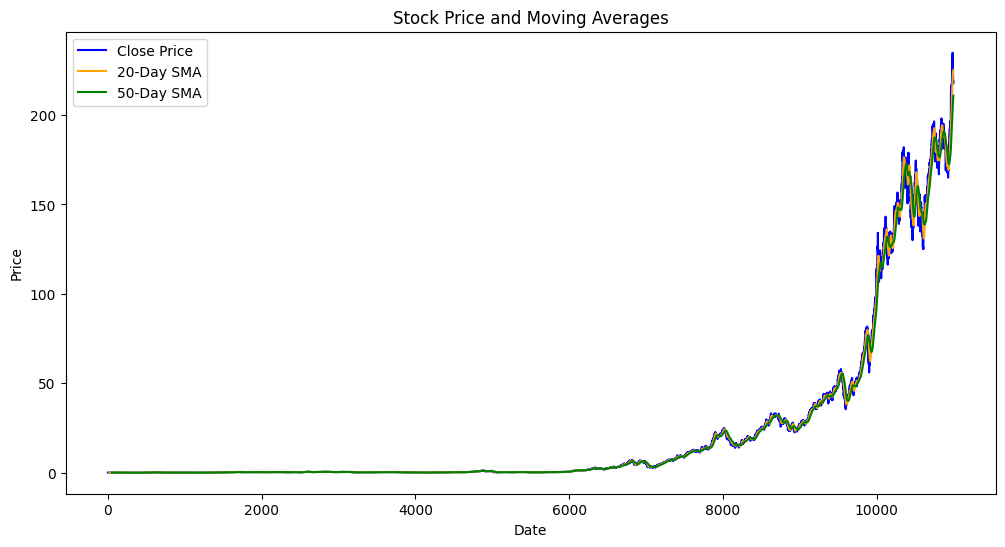

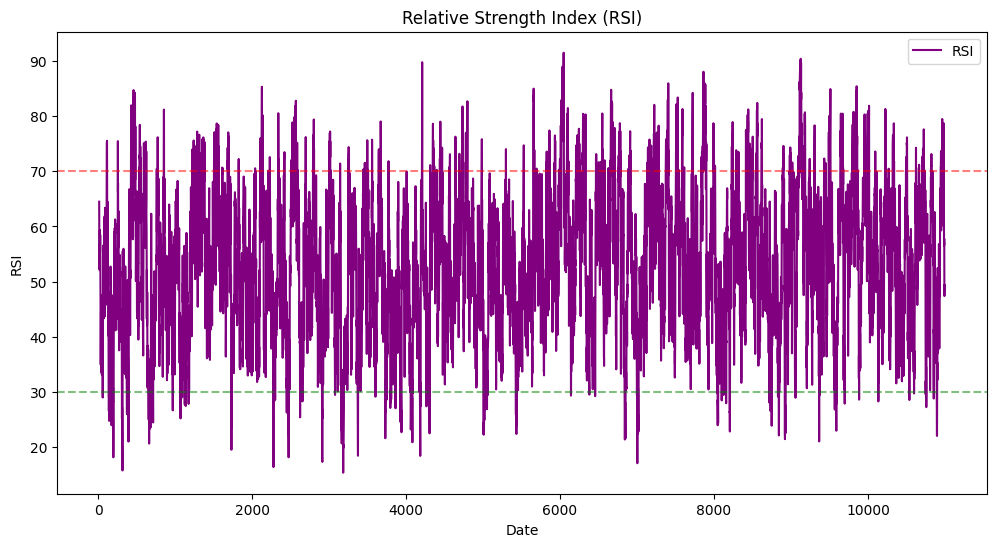

In [16]:
import matplotlib.pyplot as plt

# Plot the Close price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(df['SMA_50'], label='50-Day SMA', color='green')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()